Theoretical optimum omega =  1.9390916590666494
Potential at plates equals  1
Potential is zero on all other boundaries
Desired fractional change =  0.0001
After 0 iterations, fractional change = nan


/home/aswart/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in double_scalars


After 10 iterations, fractional change = nan
After 20 iterations, fractional change = nan
After 30 iterations, fractional change = nan
After 40 iterations, fractional change = nan
After 50 iterations, fractional change = 0.061422
After 60 iterations, fractional change = 0.026420
After 70 iterations, fractional change = 0.017399
After 80 iterations, fractional change = 0.011634
After 90 iterations, fractional change = 0.007123
After 100 iterations, fractional change = 0.006914
After 110 iterations, fractional change = 0.005642
After 120 iterations, fractional change = 0.004180
After 130 iterations, fractional change = 0.004446
After 140 iterations, fractional change = 0.003075
After 150 iterations, fractional change = 0.001868
After 160 iterations, fractional change = 0.001020
After 170 iterations, fractional change = 0.000827
After 180 iterations, fractional change = 0.000214
After 190 iterations, fractional change = 0.000113
After 200 iterations, fractional change = 0.000108
Desired a

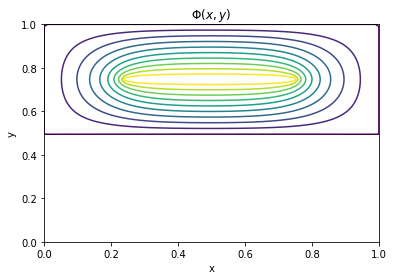

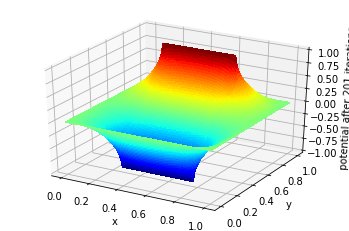

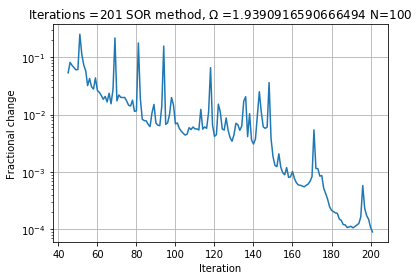

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
"""
The electric field will be greatest in the line running from the center of the 
positive plate to the center of the negative plate. Deviating from this line, 
the field will decrease since it becomes more affected by the lack of a field 
at the edges of the region.
"""

#* Initialize parameters (system size, grid spacing, etc.)
method = 3
N = 100
animate=0

L = 1          # System size (length)
h = L/(N-1)    # Grid spacing
x = np.arange(0,N)*h   # x coordinate
y = np.arange(0,N)*h # y coordinate
yy,xx = np.meshgrid(x,y) # for plotting, note the reversal in x and y
plot_interval =50 # interval to plot animation, setting it smaller slows the program down alot

#* Select over-relaxation factor (SOR only)
if( method == 3 ):
    omegaOpt = 2./(1.+np.sin(np.pi/N))  # Theoretical optimum
    print('Theoretical optimum omega = ',omegaOpt)
    omega = omegaOpt#float(input('Enter desired omega: '))

#* Set initial guess as first term in separation of variables soln.
phi0 = 1     # Potential at y=L
# phi = phi0 * 4/(np.pi*np.sinh(np.pi)) * np.outer(np.sin(np.pi*x/L),np.sinh(np.pi*y/L))
phi=np.zeros((N,N)) # try this to see it evolve better

#* Set boundary conditions
# first index is the row and second index is column
phi[0,:] = 0
phi[-1,:] = 0
phi[:,0] = 0
phi[:,-1] = 0


plate1 = int(.75*N)-1
plate2 = int(.25*N)-1
phi[plate2:(plate1+1),plate1] = phi0
phi[plate2:(plate1+1),plate2] = -phi0

mask = np.ones((N,N))
mask[plate2:(plate1+1),plate1] = 0
mask[plate2:(plate1+1),plate2] = 0
mask[0,:] = 0
mask[-1,:] = 0
mask[:,0] = 0
mask[:,-1] = 0

print('Potential at plates equals ',phi0)
print('Potential is zero on all other boundaries')

#plt.ion()

#* Loop until desired fractional change per iteration is obtained
# start_time=cputime     # Reset the cputime counter
newphi = np.copy(phi)           # Copy of the solution (used only by Jacobi)
iterMax = N**2          # Set max to avoid excessively long runs
changeDesired = 1.0e-4   # Stop when the change is given fraction
print('Desired fractional change = ',changeDesired)
change = np.array([])

for iter in range(0,iterMax):
    changeSum = 0.0
  
    ## SOR method ##
    for i in range(0,N):        # Loop over interior points only
        for j in range(0,N):
            if mask[i,j] == 1: # Only update if mask at the point is 1
                newphi = 0.25*omega*(phi[i+1,j]+phi[i-1,j]+ phi[i,j-1]+phi[i,j+1])  +  (1-omega)*phi[i,j]
                changeSum = changeSum + abs(1-phi[i,j]/newphi)
                phi[i,j] = newphi

    #* Check if fractional change is small enough to halt the iteration
    change = np.append(change,changeSum/(N-2)**2)
    if( iter%10 < 1 ):
        print('After %d iterations, fractional change = %f'%( iter,change[-1]))

    if( change[-1] < changeDesired ):
      print('Desired accuracy achieved after %d iterations'%iter)
      print('Breaking out of main loop')
      break
# animate
    if(animate ==1 and iter%plot_interval<1):
        fig = plt.figure(2)   # Clear figure 2 window and bring forward
        plt.clf()
        ax = fig.gca(projection='3d')
        surf = ax.plot_surface(xx, yy, phi, rstride=1, cstride=1, cmap=cm.jet,linewidth=0, antialiased=False)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('potential after '+str(iter)+' iterations')
        plt.draw()
        plt.show()
        plt.pause(0.1)

# total_time = cputime - start_time # get the total cpu time

#* Plot final estimate of potential as contour and surface plots

#plt.ioff()

plt.figure(1);plt.clf()
contourLevels = np.arange(0,1,0.1) #
plt.contour(xx,yy,phi,contourLevels)  # Contour plot
# clabel(cs,contourLabels)  # Add labels to selected contour levels
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'$\Phi(x,y)$')

fig = plt.figure(2)   # Clear figure 2 window and bring forward
plt.clf()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, phi, rstride=1, cstride=1, cmap=cm.jet,linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('potential after '+str(iter)+' iterations')

#* Plot the fractional change versus iteration
plt.figure(3); 
plt.clf()
plt.semilogy(change)
plt.xlabel('Iteration')
plt.ylabel('Fractional change')
if method==1:
    title=' Jacobi method'
elif(method==2):
    title =' Gauss-Seidel method'
elif(method==3):
    title=' SOR method, $\Omega$ ='+str(omega)

plt.title(r'Iterations ='+str(iter)+title+' N='+str(N))
plt.grid(True)

plt.show()
    
    



